In [1]:
# Setup show/hide source code box
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="show/hide source code"></form>''')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import everything from the data_utils library
from data_utils import *

# Load the talk data
talk_data = get_only_talks(load_data())

loading conferece_data.pkl


In [5]:
rpm_str = 'references per million words'

def text_search_plot(search, title_str, leg_loc=None, spacer=' '):
    if 'top_user' not in search.keys():
        search.update({'top_user': 'true'})
    result = text_search(talk_data, search, spacer=spacer, quiet=True)
    fig, ax = pl.subplots()
    result.plot(ax=ax, legend=False)
    ax.set_title(title_str)
    ax.set_ylabel(rpm_str)
    pl.legend(result.columns, loc=leg_loc)
    #pl.grid(axis='x')
    #ax.set_xlim(daterange)
    ax.set_ylim(bottom=0)

In [7]:
# Import libraries and setup matplotlib defaults
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
pl.style.use('bmh')
prop_cycle = pl.cycler(color=['#377eb8','#e41a1c','#4daf4a','#984ea3',
                              '#ff7f00','#ffff33','#a65628','#f781bf','#999999'])
pl.rcParams.update({
    'axes.prop_cycle': prop_cycle,
    'lines.linewidth': 2,
    'font.size': 20,
    'figure.figsize': [12, 8],
    'figure.subplot.left': 0.125,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.15})

## Usages that peaked prior to 1970
A significant fraction of the words and phrases that peaked in usage prior to 1970 can be categorized as America-centric in some way or another, and reflect a church that had not yet begun expanding internationally in a significant way. This includes the famously political talks by Ezra Taft Benson that he gave primarily in the 1960s. The reference to "Indians" seems to coincide with the church's Indian placement program, supervised in the 1950s by Spencer W. Kimball, who was the person who mentioned it most frequently.

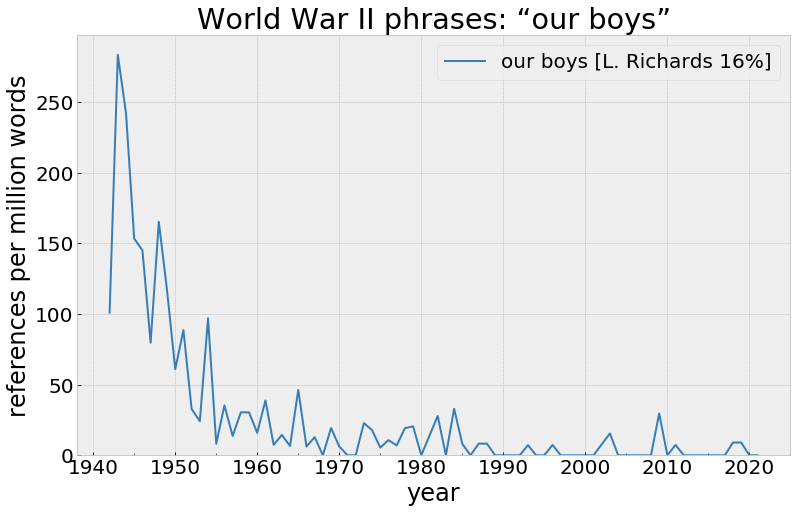

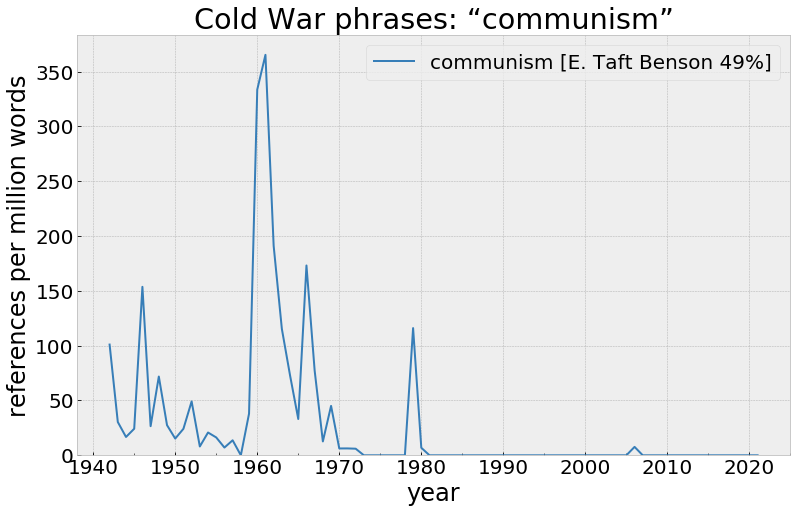

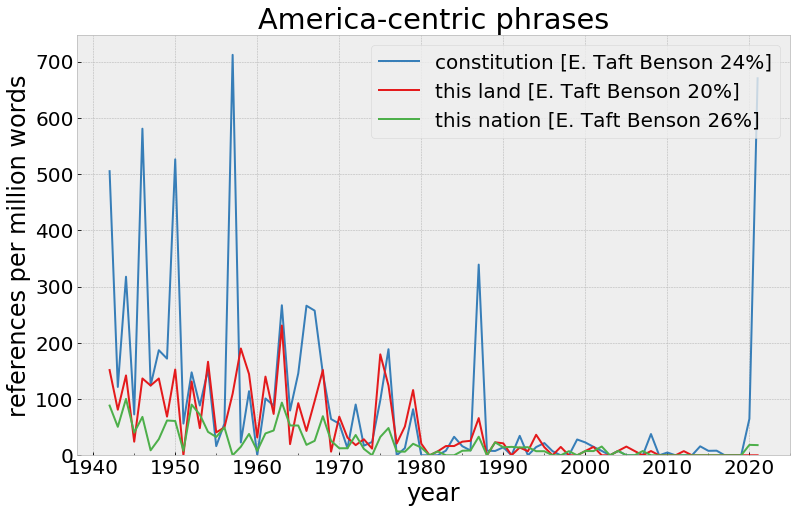

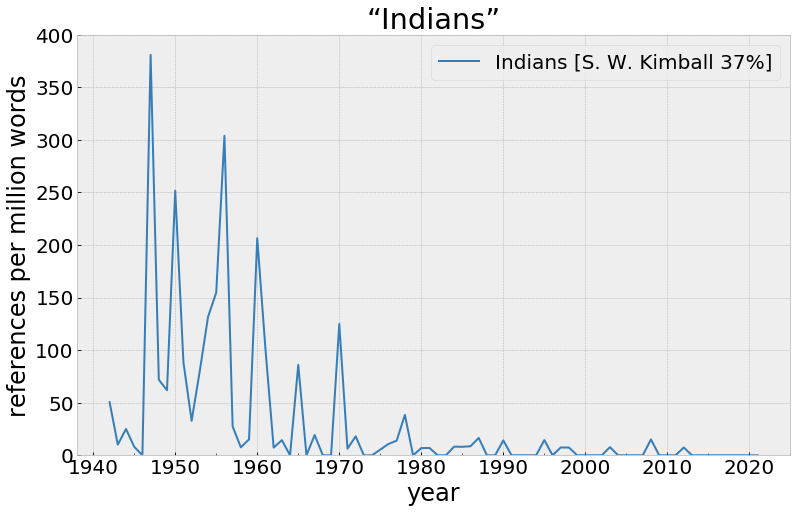

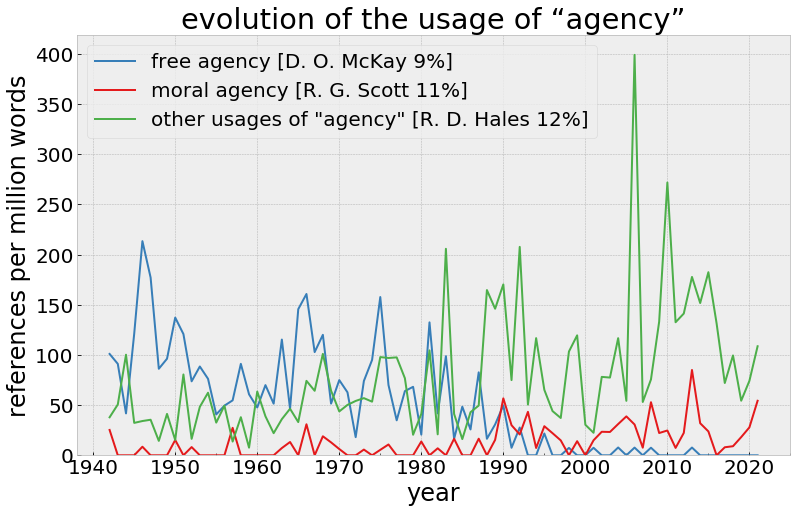

In [8]:
for searchdata, filename, title_str in (
        ({'search': [{'include': 'our boys'}]},
         'ww2',
         'World War II phrases: ' + ldqm + 'our boys' + rdqm),
        ({'search': [{'include': 'communism'}]},
         'cold war',
         'Cold War phrases: ' + ldqm + 'communism' + rdqm),
        ({'search': [{'include': 'constitution'},
                     {'include': 'this land'},
                     {'include': 'this nation'}]},
         'america',
         'America-centric phrases'),
        ({'search': [{'include': 'indians', 'label': 'Indians'}]},
         'indians',
         ldqm + 'Indians' + rdqm),
        ):
    text_search_plot(searchdata, title_str)


text_search_plot(
    {"search": [{"label": "free agency",
                 "include": "free agency"},
                {"label": "moral agency",
                 "include": "moral agency"},
                {"label": "other usages of \"agency\"",
                 "include": "agency",
                 "exclude": ["free agency", "moral agency"]}]},
    'evolution of the usage of '+ldqm+'agency'+rdqm,
    leg_loc='upper left')

